# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer
from model_evaluator import DataSource, DataPredSelection

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Fine tuning last 2 blocks (block5_conv3 and block5_pool) of VGG16 for 10 epochs and training for 200 epochs',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', 'fine-tuning', '200 epochs'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 200,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 42803
Process ID: 55659
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Fine tuning last 2 blocks (block5_conv3 and '
                               'block5_pool) of VGG16 for 10 epochs and '
                               'training for 200 epochs',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         'fine-tuning',
                         '200 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f9f69cf9280>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


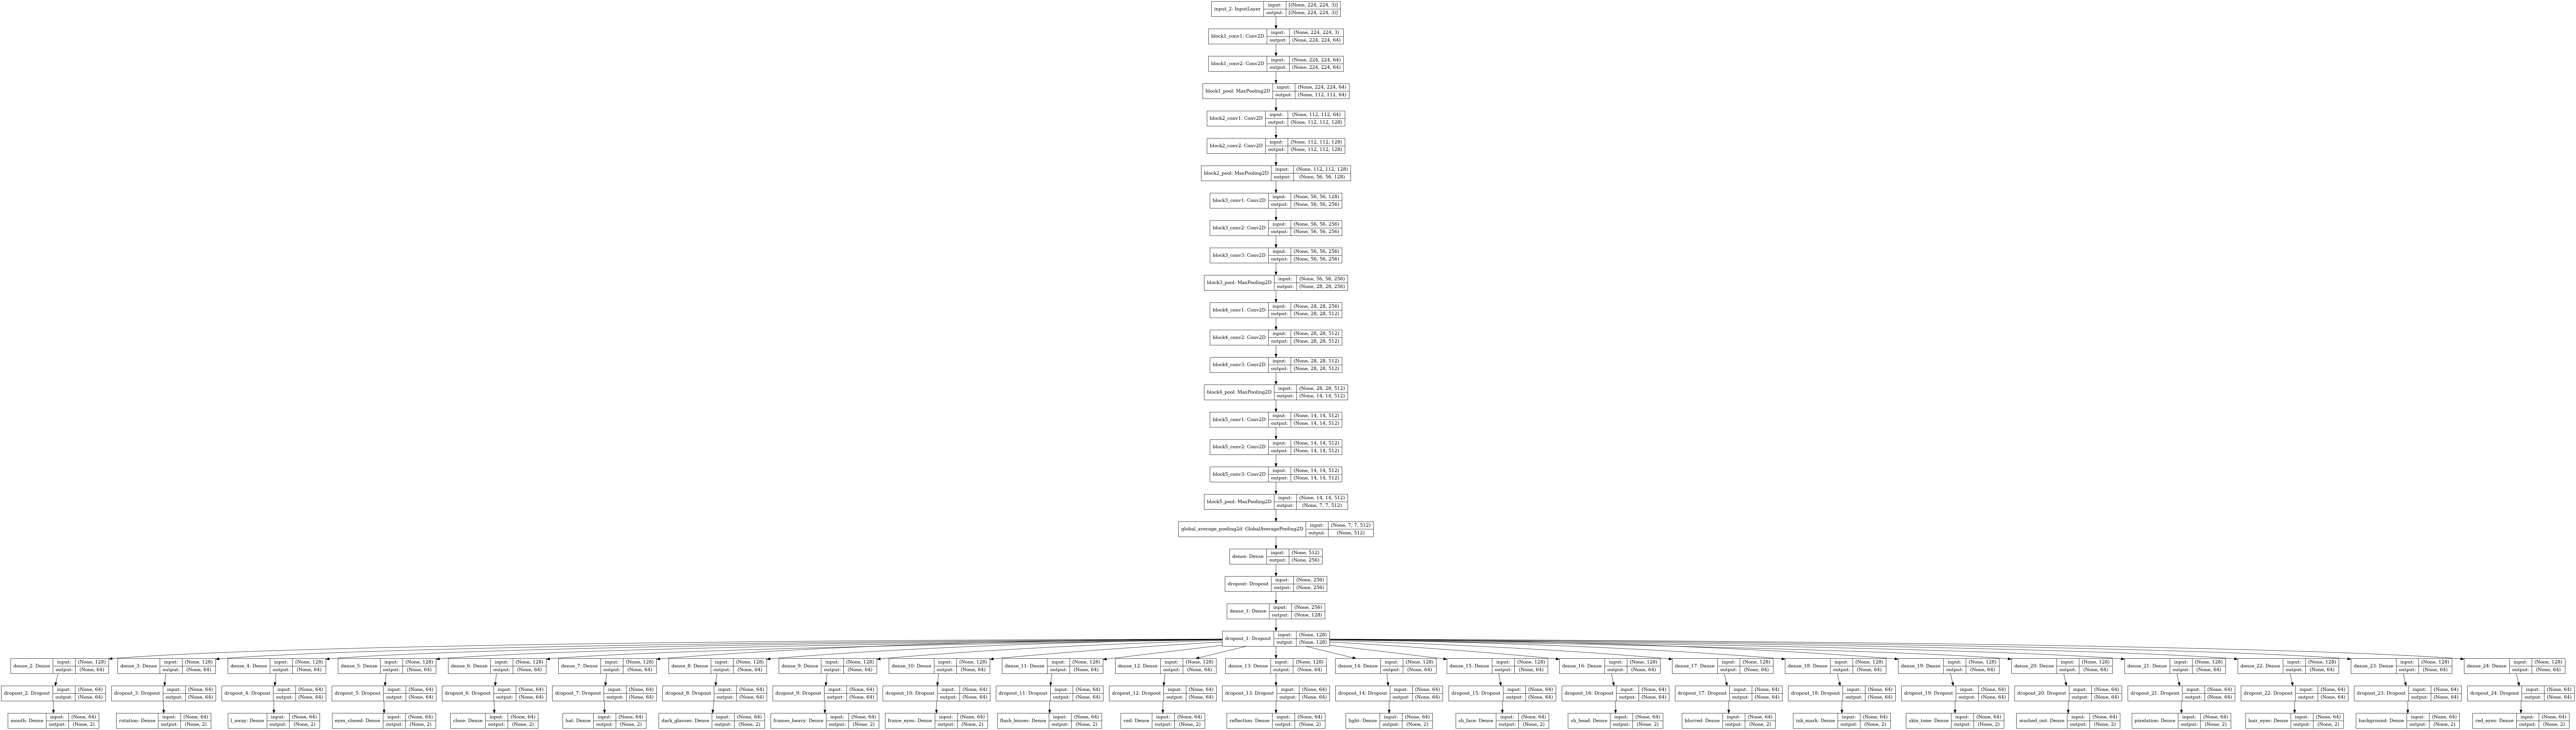

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model - Fine-Tuning

In [ ]:
runner.train_model(fine_tuned=True, n_epochs=10)

-------------------- train model -------------------
Training VGG16 network
 .. Fine tuning base model...
 .. Base model non trainable layers: ['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2']
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
___________________________________________________________________________________

59/77 [=====================>........] - ETA: 1:13 - loss: 1.3434 - mouth_loss: 0.6727 - rotation_loss: 0.6582 - l_away_loss: 0.6849 - eyes_closed_loss: 0.6414 - close_loss: 0.3952 - hat_loss: 0.5893 - dark_glasses_loss: 0.5634 - frames_heavy_loss: 0.3636 - frame_eyes_loss: 0.6817 - flash_lenses_loss: 0.6335 - veil_loss: 0.5202 - reflection_loss: 0.6933 - light_loss: 0.5194 - sh_face_loss: 0.6881 - sh_head_loss: 0.6901 - blurred_loss: 0.5643 - ink_mark_loss: 0.3531 - skin_tone_loss: 0.6936 - washed_out_loss: 0.3779 - pixelation_loss: 0.5023 - hair_eyes_loss: 0.6096 - background_loss: 0.6927 - red_eyes_loss: 0.6450 - mouth_accuracy: 0.7015 - rotation_accuracy: 0.7176 - l_away_accuracy: 0.6596 - eyes_closed_accuracy: 0.7476 - close_accuracy: 0.9089 - hat_accuracy: 0.7945 - dark_glasses_accuracy: 0.8197 - frames_heavy_accuracy: 0.9181 - frame_eyes_accuracy: 0.6862 - flash_lenses_accuracy: 0.7372 - veil_accuracy: 0.8676 - reflection_accuracy: 0.4907 - light_accuracy: 0.8488 - sh_face_accur

# Plots - Fine-Tuned

In [ ]:
runner.draw_training_history()

# Load Best Model - Fine-Tuned

In [ ]:
runner.load_best_model()

# Saving Trained Model - Fine-Tuned

In [ ]:
runner.save_model()

# Train Again Without Fine Tuning

In [ ]:
runner.train_model()

# Plots - New Train

In [ ]:
runner.draw_training_history()

# Load Best Model - New Train

In [ ]:
runner.load_best_model()

# Saving Trained Model - New Train

In [ ]:
runner.save_model()

# Test Trained Model

## Validation Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()